In [2]:
import pandas as pd 
import networkx as nx
import numpy as np
from matplotlib import pyplot as plt

/var/folders/kj/d1xg4wx91kd1nwc9s2xdpz_r0000gn/T/ipykernel_95006/4113559991.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
df = pd.read_csv('../data/CS Course Enrollment Data.csv')

In [4]:
# assign id to each row
df['id'] = range(1, len(df) + 1)
df

,Semester Admitted,Department,Major,CSCI101_Pass_Sem,CSCI101_Tran_Sem,CSCI128_Pass_Sem,CSCI128_Tran_Sem,CSCI200_Pass_C_Sem,CSCI200_Tran_Sem,CSCI210_Pass_Sem,...,CSCI262_Tran_Sem,CSCI274_Pass_Sem,CSCI306_Pass_Sem,CSCI341_Pass_Sem,CSCI358_Pass_Sem,CSCI370_Pass_Sem,CSCI400_Pass_Sem,CSCI406_Pass_Sem,CSCI442_Pass_Sem,id
0,Spring 2021,Mechanical Engineering,Mechanical Engineering,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,Spring 2023,Interdisciplinary Program,Space Resources,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
2,Spring 2021,Physics,Physics,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
3,Fall 2017,Metallurgical & Materials Eng,Metallurgical & Materials Eng,Spring 2011,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
4,Fall 2020,Civil & Environmental Enginrng,Engineering - Civil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7370,Summer Two 2018,Physics,Quantum Engineering,Spring 2019,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7371
7371,Summer Two 2018,Mechanical Engineering,Mechanical Engineering,Spring 2021,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7372
7372,Summer Two 2018,Petroleum,Petroleum Engineering,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7373
7373,Summer Two 2018,Computer Science,Computer Science,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Fall 2018,Fall 2018,Fall 2018,Fall 2018,Fall 2019,NaN,Spring 2019,Fall 2019,7374


In [5]:
# pivot table from wide to long
melted_df = pd.melt(df, id_vars=['Semester Admitted', 'Department', 'Major', 'id'], var_name='Class_Semester', value_name='Taken')

# filter out NaN rows
melted_df = melted_df.dropna(subset=['Taken', 'Department', 'Major'])

# split 'Class_Semester' into 'Class' and 'Semester'
melted_df[['Class', 'Semester_Type']] = melted_df['Class_Semester'].str.split('_', n=1, expand=True)
melted_df = melted_df.drop(columns=['Class_Semester'])

# split Semester_Type into Pass or Tran
melted_df[['Type', 'Garbage']] = melted_df['Semester_Type'].str.split('_', n=1, expand=True)
melted_df = melted_df.drop(columns=['Garbage', 'Semester_Type'])

# split taken 
melted_df[['Taken_Semester', 'Taken_Year']] = melted_df['Taken'].str.rsplit(' ', n=1, expand=True)

# replace 261 with 200, 262 with 220 
melted_df['Class'] = melted_df['Class'].replace('CSCI261', 'CSCI200')
melted_df['Class'] = melted_df['Class'].replace('CSCI262', 'CSCI220')

# remove semesters prior to Fall 2017 (NOT NEEDED)
# melted_df = melted_df[melted_df['Taken_Year'].astype(int) > 2016]
# melted_df = melted_df[~((melted_df['Taken_Year'].astype(int) == 2017) & (melted_df['Taken_Semester'] == 'Spring'))]

# Display the first few rows to verify
melted_df.sort_values(by='id').head(10)

,Semester Admitted,Department,Major,id,Taken,Class,Type,Taken_Semester,Taken_Year
66375,Spring 2021,Mechanical Engineering,Mechanical Engineering,1,Fall 2007,CSCI200,Pass,Fall,2007
66376,Spring 2023,Interdisciplinary Program,Space Resources,2,Fall 2007,CSCI200,Pass,Fall,2007
66377,Spring 2021,Physics,Physics,3,Fall 2008,CSCI200,Pass,Fall,2008
81128,Fall 2017,Metallurgical & Materials Eng,Metallurgical & Materials Eng,4,Fall 2011,CSCI220,Pass,Fall,2011
3,Fall 2017,Metallurgical & Materials Eng,Metallurgical & Materials Eng,4,Spring 2011,CSCI101,Pass,Spring,2011
66378,Fall 2017,Metallurgical & Materials Eng,Metallurgical & Materials Eng,4,Fall 2009,CSCI200,Pass,Fall,2009
66379,Fall 2020,Civil & Environmental Enginrng,Engineering - Civil,5,Fall 2009,CSCI200,Pass,Fall,2009
66380,Spring 2018,Civil & Environmental Enginrng,Engineering - Civil,6,Fall 2009,CSCI200,Pass,Fall,2009
110631,Spring 2024,Engineering,Engineering - Electrical,7,Fall 2014,CSCI341,Pass,Fall,2014
66381,Spring 2024,Engineering,Engineering - Electrical,7,Fall 2009,CSCI200,Pass,Fall,2009


# Validation

In [6]:
print("DEPARTMENTS:")
print("\t", melted_df['Department'].unique(), '\n')

print("MAJORS:")
print("\t", melted_df['Major'].unique(), '\n')

print("CLASSES:")
print("\t", melted_df['Class'].unique(), '\n')

print("SEMESTERS:")
print("\t", melted_df['Taken_Year'].unique(), '\n')

DEPARTMENTS:
	 ['Metallurgical & Materials Eng' 'Electrical Enginrg & Comp Sci'
 'Mechanical Engineering' 'Physics' 'Geophysics'
 'Non-Degree Program Grad Level' 'Computer Science'
 'Applied Math & Statistics' 'Petroleum' 'Electrical Engineering'
 'Economics and Business' 'Civil & Environmental Enginrng'
 'Interdisciplinary Program' 'Engineering Design & Society'
 'Geo & Geological Engineering' 'Non-Degree Program Undergrad' 'Undecided'
 'Chemical & Biological Engineer' 'Chemistry' 'Honors' 'Mining'
 'Humanities Arts Social Science' 'Engineering'
 'Environ Science & Engineering' 'Mathematics'] 

MAJORS:
	 ['Metallurgical & Materials Eng' 'Statistics' 'Mechanical Engineering'
 'Electrical Engineering' 'Engineering Physics' 'Computer Science'
 'Geophysical Engineering' 'Engineering & Tech Management'
 'Non-degree Graduate' 'Geophysics' 'Robotics' 'STEM Education' 'Physics'
 'Petroleum Engineering' 'Computational & Applied Math' 'Data Science'
 'CS-Computer Eng Spclty' 'CS-Robotics Intel 

In [7]:
# save to .csv
melted_df.to_csv('../data/CS_Course_Enrollment_Data_Pivot.csv', index=False)

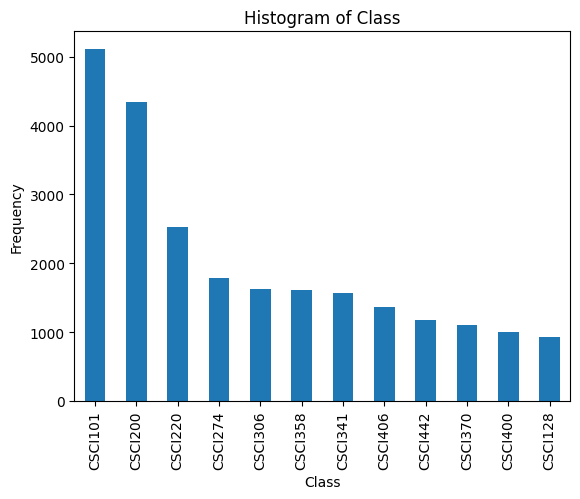

In [8]:
# plot histogram of different Classes 
melted_df['Class'].value_counts().plot(kind='bar')
plt.title('Histogram of Class')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

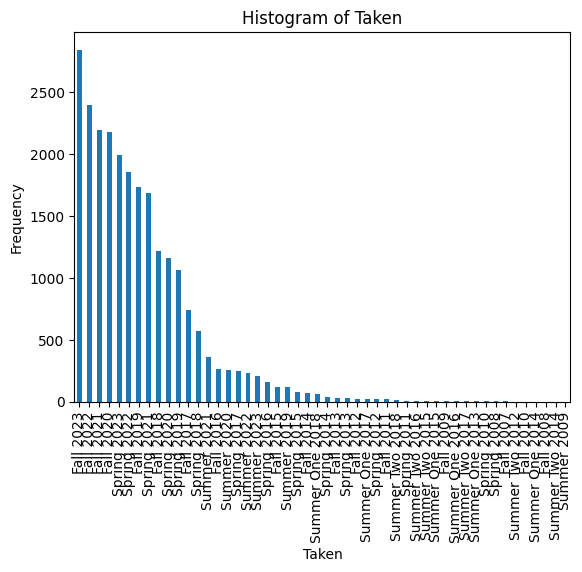

In [9]:
# plot histogram of different Semesters
melted_df['Taken'].value_counts().plot(kind='bar')
plt.title('Histogram of Taken')
plt.xlabel('Taken')
plt.ylabel('Frequency')
plt.show()

# Logit Manipulation

In [10]:
# remove duplicates from melted_df
melted_df = melted_df.drop_duplicates(subset=['id', 'Class', 'Taken', 'Type'])

In [11]:
unique_ids = melted_df['id'].unique()
unique_sems = melted_df['Taken'].unique()
unique_classes = melted_df['Class'].unique()

print(unique_ids)
print(1 in unique_ids)

[   4   10   13 ... 6862 7081 7157]
True


In [12]:
id_list = []
for id in unique_ids:
    for i in range(len(unique_classes) * len(unique_sems)):
        id_list.append(id)

class_list = []
for id in unique_ids: 
    for cl in unique_classes:
        for i in range(len(unique_sems)):
            class_list.append(cl)

sem_list = []
for i in range(len(unique_ids) * len(unique_classes)):
    for sem in unique_sems:
        sem_list.append(sem)

In [13]:
print(len(id_list), len(class_list), len(sem_list))

4415400 4415400 4415400


In [14]:
log_df = pd.DataFrame({'id': id_list, 'Class': class_list, 'Taken': sem_list})
log_df

,id,Class,Taken
0,4,CSCI101,Spring 2011
1,4,CSCI101,Fall 2012
2,4,CSCI101,Spring 2012
3,4,CSCI101,Spring 2016
4,4,CSCI101,Spring 2013
...,...,...,...
4415395,7157,CSCI442,Summer Two 2018
4415396,7157,CSCI442,Summer One 2013
4415397,7157,CSCI442,Summer One 2015
4415398,7157,CSCI442,Summer One 2016


In [15]:
# match on id
melted_df['unique_id'] = melted_df['id'].astype(str) + '_' + melted_df['Taken'].astype(str) + '_' + melted_df['Class'].astype(str)
log_df['unique_id'] = log_df['id'].astype(str) + '_' + log_df['Taken'].astype(str) + '_' + log_df['Class'].astype(str)
log_df['boolean'] = log_df['unique_id'].isin(melted_df['unique_id'])

In [16]:
print(len(log_df[log_df['boolean'].astype(str) == 'True'])) 
print(len(melted_df))

for tag in ['Class', 'Taken', 'unique_id']:
    log_classes = log_df[tag].unique().sort()
    melted_classes = melted_df[tag].unique().sort()
    print(f"Same {tag}?", log_classes == melted_classes)

24123
24137
Same Class? True
Same Taken? True
Same unique_id? True


In [17]:
print(len(log_df['Class'].unique()) * len(log_df['Taken'].unique()) * len(log_df['id'].unique()))
print(len(melted_df['id'].unique()) * len(melted_df['Taken'].unique()) * len(melted_df['Class'].unique()))

4415400
4415400


In [18]:
# save logit dataframe to .csv
log_df.to_csv('../data/CS_Course_Enrollment_Data_Log.csv', index=False)